## Part A

#### Importing Required Libraries

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#### Importing Training Data

In [297]:
train_df = pd.read_csv('CE802_P2_Data.csv')
train_data = train_df.copy()
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,22.41900,-5.0520,9179.010,2.3940,-58.920,-5404.960,4.40693,-3.2322,-4.9938,0,...,-3649.27,-6.748800,-2141.760,0,10.27280,3501.20,2.04,16357.41,NaN,True
1,12.12414,-4.1046,4746.810,0.5664,-47.240,-5423.220,4.70780,-2.7708,-4.6814,1,...,4355.41,-14.178000,-1706.220,0,13.99800,3658.88,2.04,12350.85,NaN,False
2,13.47210,-3.8719,10700.820,2.4700,-15.010,-5334.180,4.42820,-5.0070,-6.2390,0,...,-3277.69,-7.728000,-2513.250,0,11.77800,3864.30,2.04,11482.11,NaN,True
3,12.60300,-3.7919,10553.667,2.3440,-28.216,-5446.240,8.59400,-4.1715,-5.0865,0,...,-2058.59,-5.573100,-2207.670,0,10.11020,2182.80,2.04,12662.52,NaN,True
4,19.83600,-4.6420,6456.810,7.8060,-45.620,-5460.670,4.78980,-1.6536,-4.7637,0,...,-3813.58,-3.828900,507.780,0,10.35120,3246.40,2.04,12121.71,15.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.08380,-4.9960,10155.510,5.2420,-20.982,-5462.268,4.52620,-2.8761,-5.4848,0,...,-3885.89,-3.799653,-1985.520,0,10.37440,2554.20,2.04,15038.61,NaN,False
996,13.66650,-4.3146,12121.110,1.4452,-116.300,-5485.286,4.51470,-2.3400,-4.7273,0,...,-3538.19,-4.375800,-2869.320,0,9.23880,3720.54,2.04,13332.21,NaN,False
997,12.87600,-3.6867,10724.040,3.7860,-27.924,-5450.136,5.53000,-5.3190,-6.8250,0,...,-2683.59,-5.184900,-2408.724,0,9.17134,-4036.00,0.04,12827.37,14.44,True
998,16.77900,-3.9024,10998.210,1.7188,-25.672,-5434.820,4.82050,-2.8479,-4.9253,0,...,-3578.79,-4.709700,-2378.829,1,10.41200,3007.00,0.04,13415.01,NaN,True


#### Data Preparation (Part One)

##### Checking Column Data Types

In [298]:
train_data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16        int64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object

Columns Already Numerical

#### Training Data Pre-Processing

##### Missing Data

Checking for Missing Data

In [299]:
train_data.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

Getting Information About Column 'F21'

In [300]:
train_data['F21'].describe()

count    500.000000
mean      14.713520
std        1.062748
min       11.340000
25%       13.980000
50%       14.665000
75%       15.455000
max       18.150000
Name: F21, dtype: float64

Replacing Missing Data

In [301]:
train_data['F21'].fillna(train_data['F21'].mean(), inplace=True)
train_data['F21'].isna().sum()

0

#### Data Visualization

##### Checking for False Predictors

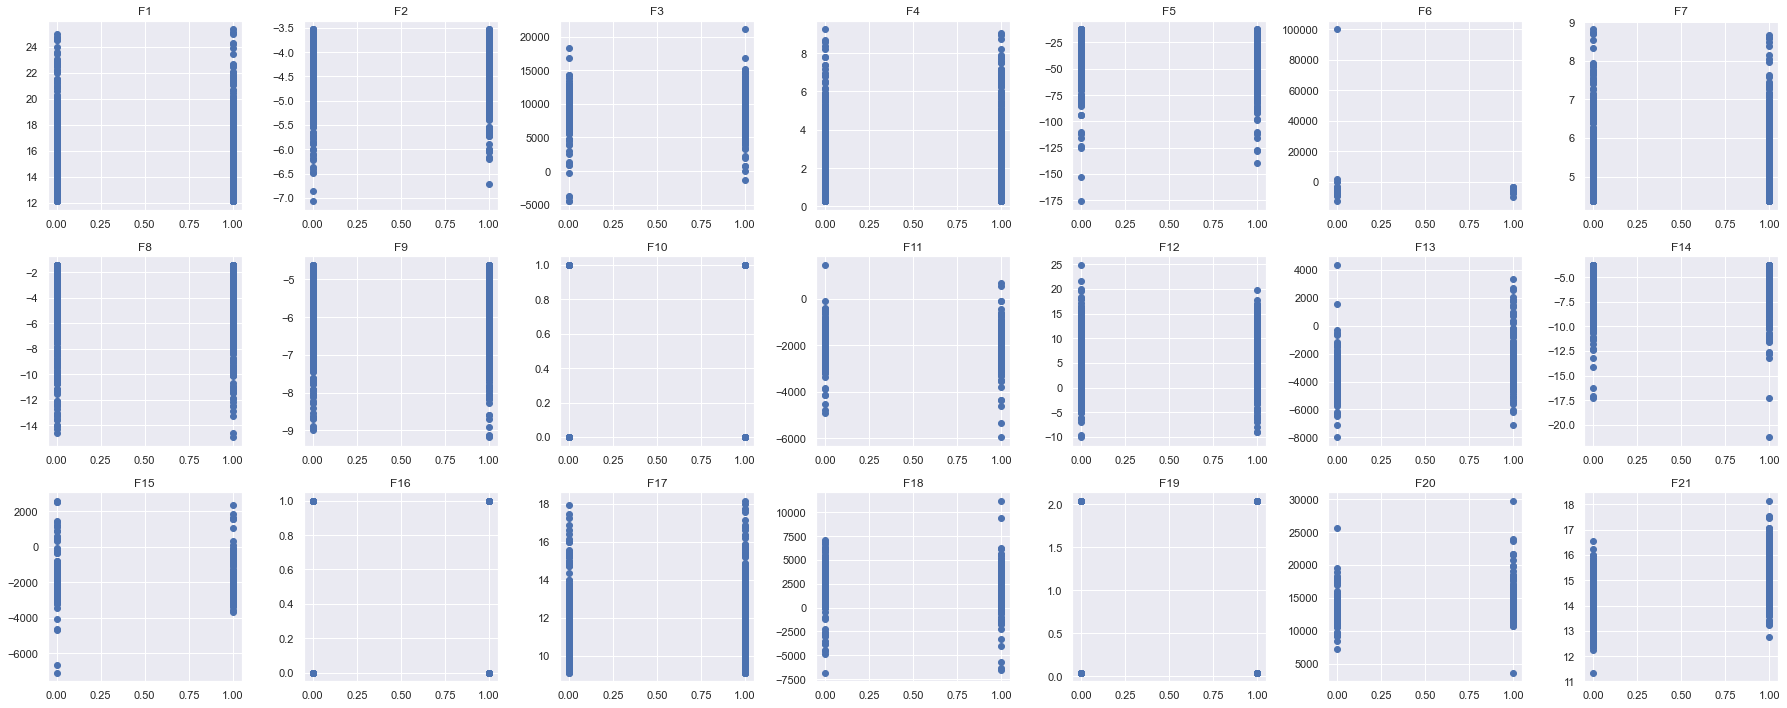

In [302]:
x = train_data.loc[:, train_data.columns != 'Class'].to_numpy()
y = train_data.loc[:, 'Class'].to_numpy()
plt.figure(figsize=(25, 10))
for i in range(x.shape[1]):
    plt.subplot(3, 7, i+1)
    plt.scatter(y,x[:,i])
    plt.title(train_data.columns[i])
plt.tight_layout()
plt.show()

No Obvious False Predictors Found

##### Checking Feature Correlation

F1      -0.022172
F2       0.026389
F3      -0.000403
F4       0.048997
F5      -0.045664
F6      -0.031054
F7      -0.007510
F8       0.028876
F9       0.039024
F10      0.010464
F11     -0.009307
F12      0.027641
F13      0.258222
F14      0.018146
F15     -0.012088
F16      0.029837
F17      0.069685
F18      0.018274
F19      0.041377
F20      0.216721
F21      0.365397
Class    1.000000
Name: Class, dtype: float64

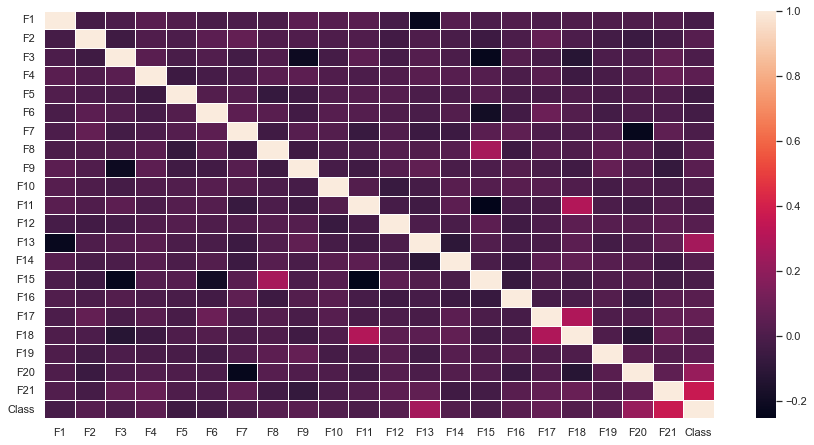

In [303]:
sns.set(rc = {'figure.figsize':(15,7.5)})
sns.heatmap(train_data.corr(), linewidth=0.5)
train_data[train_data.columns[:]].corr()['Class'][:]

No Overly-Correlating Features

#### Data Preparation (Part Two)

##### Separating Target Column

In [304]:
x = train_data.loc[:, train_data.columns != 'Class'].to_numpy()
y = train_data.loc[:, 'Class'].to_numpy()

##### Data Partitioning

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Creating Lists for Model Comparison

In [306]:
models = []
model_train_accuracies = []
model_test_accuracies = []

#### Experimenting with Classifiers

##### Decision Tree Classifier

In [307]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_pipe = Pipeline(steps=[('scaler', sc), ('classifier', dt_model)])
dt_param_grid = {
    'scaler__with_std': [True, False],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": np.arange(1, 11),
    "classifier__min_samples_leaf": [10]
}
dt_model = GridSearchCV(dt_pipe, dt_param_grid, cv=10, verbose=1, n_jobs=-1)
dt_model.fit(x_train, y_train)
print(dt_model.best_params_)

dt_train = dt_model.predict(x_train)
dt_train_accuracy = accuracy_score(y_train, dt_train)
print("Train Accuracy Score: ", dt_train_accuracy)
dt_train_conf = confusion_matrix(y_train, dt_train)
print(dt_train_conf)

dt_test = dt_model.predict(x_test)
dt_test_accuracy = accuracy_score(y_test, dt_test)
print("Test Accuracy Score: ", dt_test_accuracy)
dt_test_conf = confusion_matrix(y_test, dt_test)
print(dt_test_conf)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'scaler__with_std': False}
Train Accuracy Score:  0.9085714285714286
[[293  48]
 [ 16 343]]
Test Accuracy Score:  0.9033333333333333
[[129  24]
 [  5 142]]


Saving Score and Model

In [308]:
models.append('dt_model')
model_train_accuracies.append(dt_train_accuracy)
model_test_accuracies.append(dt_test_accuracy)
pickle.dump(dt_model, open("dt_classifier_model.p", "wb"))

#### SVM Classifier

In [309]:
from sklearn.svm import SVC

svm_model = SVC()
svm_pipe = Pipeline(steps=[('scaler', sc), ('classifier', svm_model)])
svm_param_grid = {
    "scaler__with_std": [True, False],
    "classifier__C": [0.1, 1, 10, 100, 1000],
    "classifier__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
}
svm_model = GridSearchCV(svm_pipe, svm_param_grid, cv=10, verbose=1, n_jobs=-1)
svm_model.fit(x_train, y_train)
print(svm_model.best_params_)

svm_train = svm_model.predict(x_train)
svm_train_accuracy = accuracy_score(y_train, svm_train)
print("Train Accuracy Score: ", svm_train_accuracy)
svm_train_conf = confusion_matrix(y_train, svm_train)
print(svm_train_conf)

svm_test = svm_model.predict(x_test)
svm_test_accuracy = accuracy_score(y_test, svm_test)
print("Test Accuracy Score: ", svm_test_accuracy)
svm_test_conf = confusion_matrix(y_test, svm_test)
print(svm_test_conf)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler__with_std': True}
Train Accuracy Score:  0.9457142857142857
[[322  19]
 [ 19 340]]
Test Accuracy Score:  0.7233333333333334
[[114  39]
 [ 44 103]]


Saving Score and Model

In [310]:
models.append('svm_model')
model_train_accuracies.append(svm_train_accuracy)
model_test_accuracies.append(svm_test_accuracy)
pickle.dump(svm_model, open("svm_classifier_model.p", "wb"))

#### k-NN Classifier

In [311]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[('scaler', sc), ('classifier', knn_model)])
knn_param_grid = {
    "scaler__with_std": [True, False],
    "classifier__n_neighbors": np.arange(1, 51),
    "classifier__p": [1, 2]
}
knn_model = GridSearchCV(knn_pipe, knn_param_grid, cv=10, verbose=1, n_jobs=-1)
knn_model.fit(x_train, y_train)
print(knn_model.best_params_)

knn_train = knn_model.predict(x_train)
knn_train_accuracy = accuracy_score(y_train, knn_train)
print("Train Accuracy Score: ", knn_train_accuracy)
knn_train_conf = confusion_matrix(y_train, knn_train)
print(knn_train_conf)

knn_test = knn_model.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_test)
print("Test Accuracy Score: ", knn_test_accuracy)
knn_test_conf = confusion_matrix(y_test, knn_test)
print(knn_test_conf)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
{'classifier__n_neighbors': 25, 'classifier__p': 1, 'scaler__with_std': True}
Train Accuracy Score:  0.7671428571428571
[[295  46]
 [117 242]]
Test Accuracy Score:  0.6933333333333334
[[127  26]
 [ 66  81]]


Saving Score and Model

In [312]:
models.append('knn_model')
model_train_accuracies.append(knn_train_accuracy)
model_test_accuracies.append(knn_test_accuracy)
pickle.dump(knn_model, open("knn_classifier_model.p", "wb"))

#### Random Forest Classifier

In [326]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_pipe = Pipeline(steps=[('scaler', sc), ('classifier', rf_model)])
rf_param_grid = {
    "scaler__with_std" : [True, False],
    'classifier__n_estimators': np.arange(100, 151, 10),
    'classifier__max_depth': np.arange(1, 11),
    'classifier__min_samples_leaf': [10]
}
rf_model = GridSearchCV(rf_pipe, rf_param_grid, cv=10, verbose=1, n_jobs=-1)
rf_model.fit(x_train, y_train)
print(rf_model.best_params_)

rf_train = rf_model.predict(x_train)
rf_train_accuracy = accuracy_score(y_train, rf_train)
print("Train Accuracy Score: ", rf_train_accuracy)
rf_train_conf = confusion_matrix(y_train, rf_train)
print(rf_train_conf)

rf_test = rf_model.predict(x_test)
rf_test_accuracy = accuracy_score(y_test, rf_test)
print("Test Accuracy Score: ", rf_test_accuracy)
rf_test_conf = confusion_matrix(y_test, rf_test)
print(rf_test_conf)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'classifier__max_depth': 9, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 130, 'scaler__with_std': False}
Train Accuracy Score:  0.9371428571428572
[[310  31]
 [ 13 346]]
Test Accuracy Score:  0.83
[[127  26]
 [ 25 122]]


Saving Score and Model

In [327]:
models.append('rf_model')
model_train_accuracies.append(rf_train_accuracy)
model_test_accuracies.append(rf_test_accuracy)
pickle.dump(rf_model, open("rf_classifier_model.p", "wb"))

#### Comparison

In [328]:
model_comparison = pd.DataFrame()
model_comparison['Model'] = models
model_comparison['Train Accuracy'] = model_train_accuracies
model_comparison['Test Accuracy'] = model_test_accuracies
model_comparison

,Model,Train Accuracy,Test Accuracy
0,dt_model,0.908571,0.903333
1,svm_model,0.945714,0.723333
2,knn_model,0.767143,0.693333
3,rf_model,0.937143,0.830000


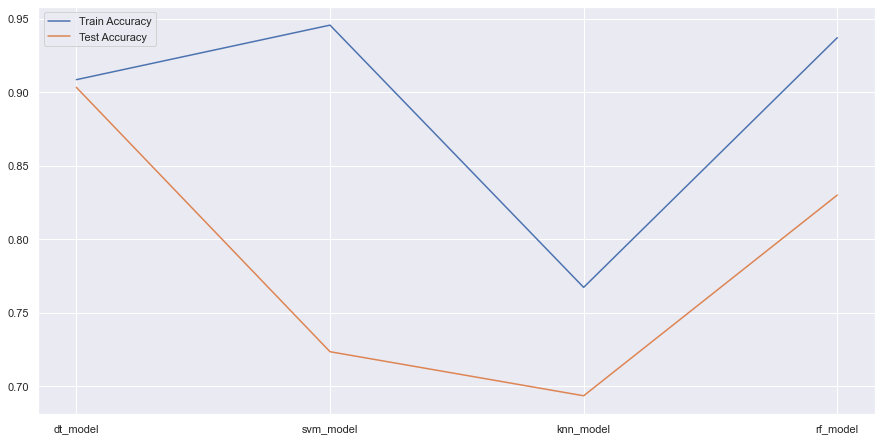

In [337]:
plt.plot(model_comparison['Model'], model_comparison['Train Accuracy'], label = "Train Accuracy")
plt.plot(model_comparison['Model'], model_comparison['Test Accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

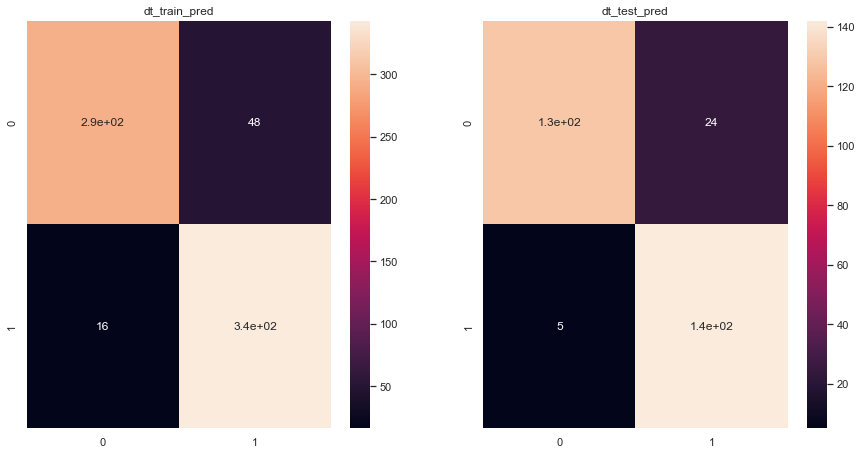

In [346]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('dt_train_pred')
sns.heatmap(dt_train_conf, ax=ax1, annot=True)
ax2.set_title('dt_test_pred')
sns.heatmap(dt_test_conf, ax=ax2, annot=True)
plt.show()

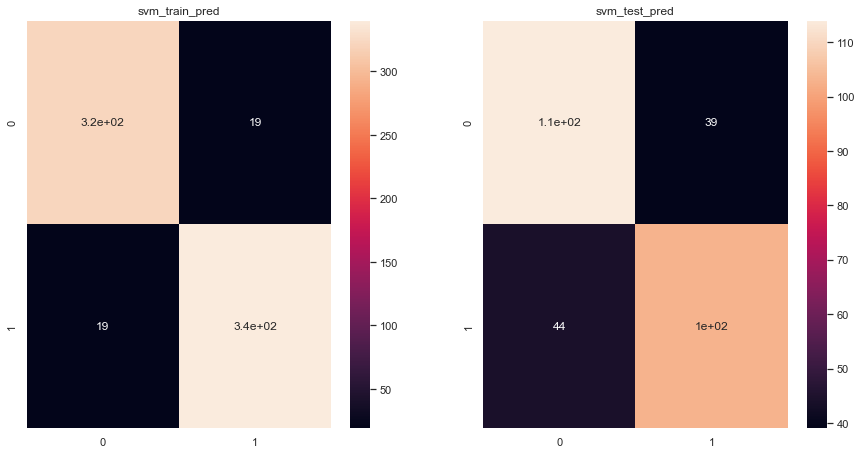

In [347]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('svm_train_pred')
sns.heatmap(svm_train_conf, ax=ax1, annot=True)
ax2.set_title('svm_test_pred')
sns.heatmap(svm_test_conf, ax=ax2, annot=True)
plt.show()

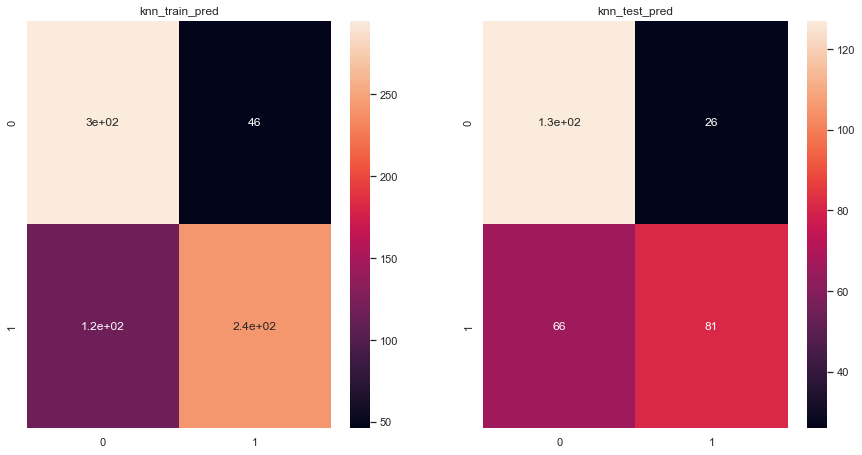

In [350]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('knn_train_pred')
sns.heatmap(knn_train_conf, ax=ax1, annot=True)
ax2.set_title('knn_test_pred')
sns.heatmap(knn_test_conf, ax=ax2, annot=True)
plt.show()

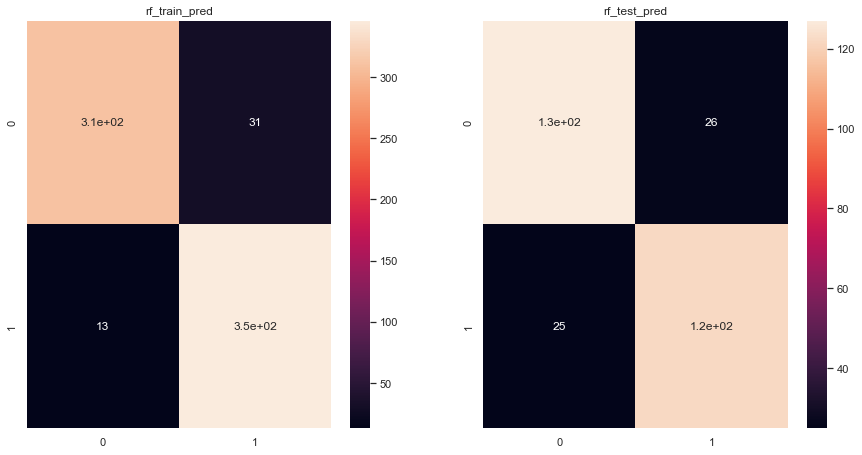

In [351]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('rf_train_pred')
sns.heatmap(rf_train_conf, ax=ax1, annot=True)
ax2.set_title('rf_test_pred')
sns.heatmap(rf_test_conf, ax=ax2, annot=True)
plt.show()

#### Selecting a Model

In [352]:
# model = pickle.load(open("dt_classifier_model.p", "rb"))
model = dt_model    # using this as extra files are not allowed in the moodle submission

## Part B

#### Importing Testing Data

In [353]:
test_df = pd.read_csv('CE802_P2_Test.csv')
test_data = test_df.iloc[:,:-1].copy()
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,12.19434,-4.04080,12708.210,0.8192,-26.0320,-5646.140,5.4150,-1.91220,-4.69020,0,...,5.83125,668.41,-3.889080,-2164.230,0,10.7196,3054.800,0.04,12826.86,NaN
1,19.70700,-5.18200,9651.810,1.0418,-19.4540,-5541.680,5.2977,-6.02700,-5.70300,1,...,6.21360,-3801.77,-3.981990,-2175.450,0,12.6300,3427.200,0.04,13053.51,14.37
2,13.80600,-5.71600,10903.710,0.4244,-50.7200,-5488.610,5.2426,-4.63500,-5.26470,0,...,10.55700,-3133.29,-5.562300,-2533.920,1,11.4600,3663.620,2.04,13007.01,NaN
3,13.30020,-5.03500,10830.030,1.1048,-28.1660,-5395.760,4.6071,-1.56057,-5.96500,0,...,5.46110,-4097.59,-4.521900,-1490.520,0,13.0920,3343.800,2.04,12465.30,NaN
4,14.20890,-3.56282,9547.110,3.0220,-38.2200,-5389.220,5.3580,-4.06650,-5.25200,1,...,4.68100,-3419.89,-7.818000,-2260.410,1,14.2720,3763.838,2.04,12859.71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.90840,-3.65420,10551.801,3.2120,-47.4200,-5456.602,6.9410,-1.79310,-7.91400,0,...,-2.11400,-3937.19,-4.667700,-1739.220,0,10.6118,3198.600,2.04,12511.56,15.32
996,14.11590,-3.55414,10907.610,2.5160,-60.1400,-5480.558,5.0525,-3.49680,-5.33470,1,...,-1.72600,-3574.09,-4.063680,-2418.507,0,9.7280,3155.000,0.04,12256.92,15.52
997,13.81770,-4.09350,10689.600,0.7696,-18.0840,-5493.040,7.3360,-8.34600,-5.31260,0,...,4.23900,-3280.69,-7.314000,-2377.140,0,12.4480,3355.200,0.04,12722.64,16.17
998,12.93780,-4.47550,10108.710,2.6080,-24.1540,-5476.712,5.3160,-7.30800,-4.63681,0,...,-6.40000,-3401.79,-3.833070,-2376.030,0,14.2000,3676.300,0.04,12434.52,13.78


#### Testing Data Pre-Processing

##### Missing Data

In [354]:
test_data.isna().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21    500
dtype: int64

Getting Information About Column 'F21'

In [355]:
test_data['F21'].describe()

count    500.000000
mean      14.726380
std        1.053944
min       10.320000
25%       13.987500
50%       14.750000
75%       15.450000
max       17.670000
Name: F21, dtype: float64

Replacing Missing Data

In [356]:
test_data['F21'].fillna(test_data['F21'].mean(), inplace=True)
test_data['F21'].isna().sum()

0

#### Making Predictions

In [357]:
predicted = model.predict(test_data)
test_df.iloc[:,-1] = predicted

#### Saving Predictions

In [358]:
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])